In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# define global variables and vectors
n_steps = 100

S = np.zeros(n_steps)
I = np.zeros(n_steps)
R = np.zeros(n_steps)
P = np.zeros(n_steps)
N = np.zeros(n_steps)

changing_points = [
    25,
    50,
    75,
]

# # first scenario
# betas = np.array([0.3, 0.4, 0.25, 0.2])
# gammas = np.array([0.05, 0.15, 0.2, 0.25])

N[0] = 1_000_000
S[0] = N[0] - 50
I[0] = 50
R[0] = 0
P[0] = I[0] / N[0]

In [3]:
beta = np.concatenate(
    (
        np.ones(
            25,
        )
        * 0.5,
        np.ones(
            25,
        )
        * 0.3,
        np.ones(
            25,
        )
        * 0.4,
        np.ones(
            25,
        )
        * 0.2,
    )
)

In [4]:
gamma = np.concatenate(
    (
        np.ones(
            25,
        )
        * 0.1,
        np.ones(
            25,
        )
        * 0.3,
        np.ones(
            25,
        )
        * 0.2,
        np.ones(
            25,
        )
        * 0.4,
    )
)

In [5]:
for i in range(1, n_steps):
    delta_i = np.random.binomial(S[i - 1], 1 - np.exp(-beta[i] * P[i - 1]))
    delta_r = np.random.binomial(I[i - 1], gamma[i])
    S[i] = S[i - 1] - delta_i
    I[i] = I[i - 1] + delta_i - delta_r
    R[i] = R[i - 1] + delta_r
    N[i] = S[i] + I[i] + R[i]
    P[i] = I[i] / N[i]

In [6]:
np.savez("scenario_3", S=S, I=I, R=R, N=N, P=P, beta=beta, gamma=gamma)

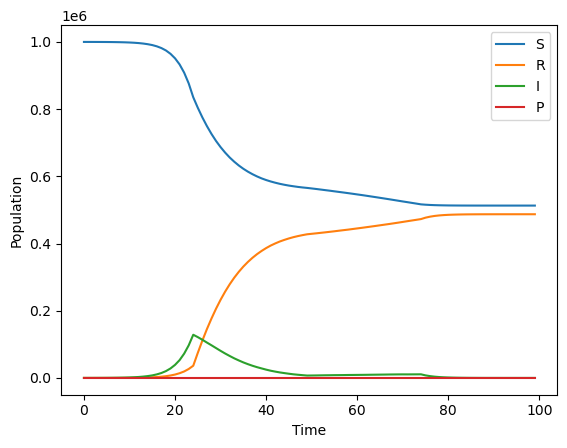

In [7]:
def plot_population_data(S, R, I, P):
    """
    Plots the population data for susceptible (S), recovered (R), and infected (I) individuals over time.

    Parameters:
    S (array-like): Array of susceptible population counts over time.
    R (array-like): Array of recovered population counts over time.
    I (array-like): Array of infected population counts over time.

    Returns:
    None
    """
    plt.plot(S, label="S")
    plt.plot(R, label="R")
    plt.plot(I, label="I")
    plt.plot(P, label="P")
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.legend()
    plt.show()


plot_population_data(S, R, I, P)

In [8]:
P

array([5.00000e-05, 6.40000e-05, 8.90000e-05, 1.24000e-04, 1.80000e-04,
       2.49000e-04, 3.60000e-04, 5.34000e-04, 7.36000e-04, 1.02700e-03,
       1.43500e-03, 2.01900e-03, 2.80600e-03, 3.92500e-03, 5.46200e-03,
       7.50700e-03, 1.05370e-02, 1.45950e-02, 2.02950e-02, 2.81780e-02,
       3.88590e-02, 5.30130e-02, 7.22220e-02, 9.69580e-02, 1.28464e-01,
       1.21394e-01, 1.13555e-01, 1.05221e-01, 9.71430e-02, 8.88320e-02,
       8.05590e-02, 7.26550e-02, 6.52970e-02, 5.82690e-02, 5.20060e-02,
       4.61490e-02, 4.09490e-02, 3.62070e-02, 3.20010e-02, 2.82930e-02,
       2.46740e-02, 2.14430e-02, 1.87960e-02, 1.63560e-02, 1.43630e-02,
       1.24540e-02, 1.07280e-02, 9.40800e-03, 8.19700e-03, 7.05100e-03,
       7.21600e-03, 7.41400e-03, 7.63900e-03, 7.87500e-03, 8.00600e-03,
       8.26400e-03, 8.33900e-03, 8.48800e-03, 8.73000e-03, 8.81900e-03,
       8.98000e-03, 9.09600e-03, 9.27000e-03, 9.47100e-03, 9.64400e-03,
       9.81400e-03, 9.97600e-03, 1.02000e-02, 1.03330e-02, 1.049